# Homework Assignment 3

Aim is to use logisitic regression to try and capture as many winning IPO trades after the open as possible. 

## Steps:
- Use feature engineering to create new features that might be predictive
- Use correlation matrix to see if any features have strong correlation to results
- Test some features in logisitic regression and try to maximize accuracy 
- Use Lasso regression on all features to determine which features to run through a logistic regression 


In [847]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [848]:
df = pd.read_csv('ipo_scoop.csv', 
                 usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
                 skiprows=2, 
                 names=['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price', 'first_day_close', 'first_day_pctchg', 'dollar_change_open', 'dollar_change_close', 'star_rating', 'performed'])

In [849]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 12 columns):
date                   3123 non-null object
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null object
open_price             3123 non-null object
first_day_close        3123 non-null object
first_day_pctchg       3123 non-null object
dollar_change_open     3123 non-null object
dollar_change_close    3123 non-null object
star_rating            3123 non-null object
performed              357 non-null object
dtypes: object(12)
memory usage: 294.6+ KB


In [850]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,$4.00,$4.40,$6.18,54.50%,$0.40,$2.18,N/C,NaN
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,$4.00,$5.51,$5.56,39.00%,$1.51,$1.56,1,Missed
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,$4.00,$5.20,$4.62,15.50%,$1.20,$0.62,N/C,NaN
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,$5.00,$5.00,$4.38,-12.40%,$0.00,-$0.62,1,NaN
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,$5.00,$5.55,$4.88,-2.40%,$0.55,-$0.12,1,NaN


In [851]:
df = df.applymap(lambda x: x if not '$' in str(x) else x.replace('$', ''))

In [852]:
df = df.applymap(lambda x: x if not '%' in str(x) else x.replace('%', ''))

In [853]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,N/C,NaN
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,39.00,1.51,1.56,1,Missed
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,4.00,5.20,4.62,15.50,1.20,0.62,N/C,NaN
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.00,5.00,4.38,-12.40,0.00,-0.62,1,NaN
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,5.00,5.55,4.88,-2.40,0.55,-0.12,1,NaN


In [854]:
df[df['date'] == '11/120']

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
1258,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.00,17.00,18.40,15.00,1.00,2.40,1,NaN


In [855]:
df.loc[1258, 'date'] = '2012-11-20'

In [856]:
df['date'] = pd.to_datetime(df['date'])

In [857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 12 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null object
open_price             3123 non-null object
first_day_close        3123 non-null object
first_day_pctchg       3123 non-null object
dollar_change_open     3123 non-null object
dollar_change_close    3123 non-null object
star_rating            3123 non-null object
performed              357 non-null object
dtypes: datetime64[ns](1), object(11)
memory usage: 294.6+ KB


In [858]:
df['offer_price'] = df['offer_price'].astype('float')

In [859]:
df['open_price'] = df['open_price'].astype('float')
df['first_day_close'] = df['first_day_close'].astype('float')

In [860]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed'],
      dtype='object')

In [861]:
df.replace('N/C', 0, inplace=True)

In [862]:
for col in df.columns[4:11]:
    df[col] = df[col].astype('float')

In [863]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 12 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null float64
open_price             3123 non-null float64
first_day_close        3123 non-null float64
first_day_pctchg       3123 non-null float64
dollar_change_open     3123 non-null float64
dollar_change_close    3123 non-null float64
star_rating            3123 non-null float64
performed              357 non-null object
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 294.6+ KB


### Opening Day Change

In [864]:
df.groupby(df.date.dt.year)['first_day_pctchg'].mean()

date
2000.0    35.562278
2001.0    12.761489
2002.0     7.247043
2003.0    11.945000
2004.0    10.703276
2005.0     9.910752
2006.0     9.988270
2007.0    11.521406
2008.0     2.318085
2009.0     7.175738
2010.0     8.654875
2011.0     9.044406
2012.0    11.981918
2013.0    16.352652
2014.0    12.363160
2015.0    13.947341
2016.0    10.979623
2017.0    10.537348
2018.0    14.417569
Name: first_day_pctchg, dtype: float64

In [865]:
mean_year_first = df.groupby(df.date.dt.year)['first_day_pctchg'].mean()

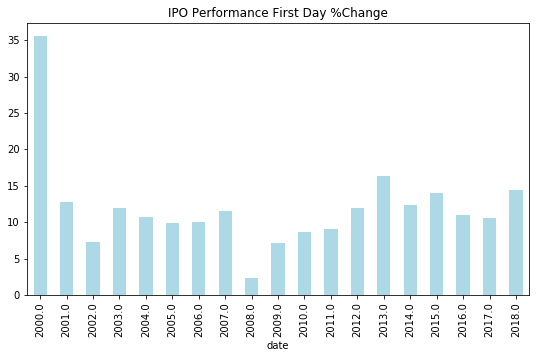

In [866]:
%matplotlib inline
mean_year_first.plot(kind = 'bar', color = 'lightblue', figsize = (9, 5), title = 'IPO Performance First Day %Change')

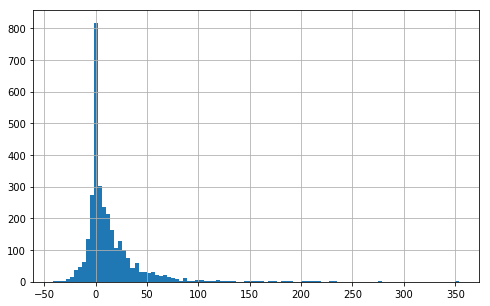

In [867]:
df.first_day_pctchg.hist(bins = 100, figsize = (8, 5))

In [868]:
df['dollar_chg_opencls'] = df['dollar_change_close'] - df['dollar_change_open']

In [869]:
df['pct_chg_opencls'] = (df['dollar_chg_opencls']/df['open_price']) * 100

In [870]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072


In [871]:
df.pct_chg_opencls.describe()

count    3123.000000
mean        1.347351
std        11.031025
min       -98.522167
25%        -2.870650
50%         0.000000
75%         4.000000
max       159.417476
Name: pct_chg_opencls, dtype: float64

In [872]:
df[df.pct_chg_opencls < -98]

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
2218,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,3.67,6.22,0.22,1.0,NaN,-6.0,-98.522167


In [873]:
df.loc[2218, 'dollar_change_open'] = 0.09

In [874]:
df.iloc[2218]

date                      2005-04-18 00:00:00
issuer                 Terra Nova Acquisition
symbol                                  TNVAU
managers                    EarlyBird Capital
offer_price                                 6
open_price                               6.09
first_day_close                          6.22
first_day_pctchg                         3.67
dollar_change_open                       0.09
dollar_change_close                      0.22
star_rating                                 1
performed                                 NaN
dollar_chg_opencls                         -6
pct_chg_opencls                      -98.5222
Name: 2218, dtype: object

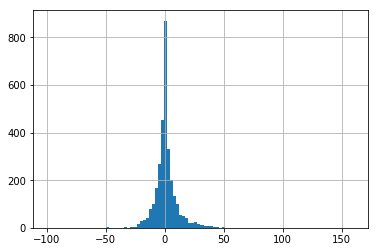

In [875]:
df.pct_chg_opencls.hist(bins= 100)

In [876]:
df[df.date >= '2018']['dollar_chg_opencls'].describe()

count    144.000000
mean       0.355833
std        2.476673
min       -6.260000
25%       -0.652500
50%        0.000000
75%        0.567500
max       14.750000
Name: dollar_chg_opencls, dtype: float64

In [877]:
df[df.date >= '2018']['dollar_chg_opencls'].sum()

51.24000000000001

In [878]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072


In [879]:
# Add IPO price to open price as POP
df['gap'] = 100*(df['open_price'] - df['offer_price'])/ df["offer_price"]

In [880]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,gap
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,10.00
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,37.75
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,30.00
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,0.00
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,11.00


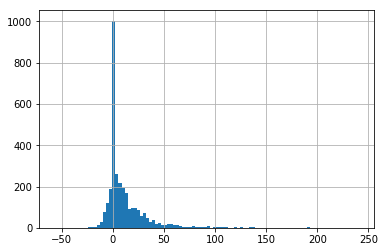

In [881]:
df['gap'].hist(bins=100)

In [882]:
df['gap'].sort_values(ascending=False).head()

2935    240.740741
2902    220.000000
2923    216.666667
1364    200.000000
3052    191.304348
Name: gap, dtype: float64

### Feature Engineering



In [883]:
sp = pd.read_csv('spy_data.csv')

In [884]:
sp.head()

,Date,Open,High,Low,Close,Adj Close
0,1/3/2000,148.250000,148.250000,143.875000,145.4375,102.930847
1,1/4/2000,143.531204,144.062500,139.640594,139.7500,98.905685
2,1/5/2000,139.937500,141.531204,137.250000,140.0000,99.082603
3,1/6/2000,139.625000,141.500000,137.750000,137.7500,97.490211
4,1/7/2000,140.312500,145.750000,140.062500,145.7500,103.152069


In [885]:
sp.sort_values('Date', inplace = True)
sp.reset_index(drop= True, inplace = True)

In [886]:
sp.head()

,Date,Open,High,Low,Close,Adj Close
0,1/10/2000,146.250000,146.906204,145.031204,146.250000,103.505920
1,1/10/2001,129.000000,132.125000,128.812500,132.125000,94.492622
2,1/10/2002,115.690002,116.349998,115.300003,116.080002,84.079330
3,1/10/2003,91.949997,93.639999,91.800003,93.059998,68.474037
4,1/10/2005,118.339996,119.459999,118.339996,119.000000,90.692780


In [887]:
sp['day_ago'] = sp.Date.shift(periods=1)
sp['week_ago'] = sp.Date.shift(periods = 7)

In [888]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,day_ago,week_ago
0,1/10/2000,146.250000,146.906204,145.031204,146.250000,103.505920,NaN,NaN
1,1/10/2001,129.000000,132.125000,128.812500,132.125000,94.492622,1/10/2000,NaN
2,1/10/2002,115.690002,116.349998,115.300003,116.080002,84.079330,1/10/2001,NaN
3,1/10/2003,91.949997,93.639999,91.800003,93.059998,68.474037,1/10/2002,NaN
4,1/10/2005,118.339996,119.459999,118.339996,119.000000,90.692780,1/10/2003,NaN


In [889]:
sp['day_ago_close'] = sp['Adj Close'].shift(periods = 1)

In [890]:
sp['week_ago_close'] = sp['Adj Close'].shift(periods = 7)

In [891]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,day_ago,week_ago,day_ago_close,week_ago_close
0,1/10/2000,146.250000,146.906204,145.031204,146.250000,103.505920,NaN,NaN,NaN,NaN
1,1/10/2001,129.000000,132.125000,128.812500,132.125000,94.492622,1/10/2000,NaN,103.505920,NaN
2,1/10/2002,115.690002,116.349998,115.300003,116.080002,84.079330,1/10/2001,NaN,94.492622,NaN
3,1/10/2003,91.949997,93.639999,91.800003,93.059998,68.474037,1/10/2002,NaN,84.079330,NaN
4,1/10/2005,118.339996,119.459999,118.339996,119.000000,90.692780,1/10/2003,NaN,68.474037,NaN


In [892]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 10 columns):
Date              4688 non-null object
Open              4688 non-null float64
High              4688 non-null float64
Low               4688 non-null float64
Close             4688 non-null float64
Adj Close         4688 non-null float64
day_ago           4687 non-null object
week_ago          4681 non-null object
day_ago_close     4687 non-null float64
week_ago_close    4681 non-null float64
dtypes: float64(7), object(3)
memory usage: 366.3+ KB


In [893]:
sp['chg'] = ((sp.day_ago_close - sp.week_ago_close)/sp.week_ago_close) * 100

In [894]:
sp.chg.describe()

count    4681.000000
mean       22.144308
std        76.833597
min       -76.566146
25%       -45.631546
50%         6.763324
75%        72.508144
max       376.538205
Name: chg, dtype: float64

In [895]:
sp.head(10)

,Date,Open,High,Low,Close,Adj Close,day_ago,week_ago,day_ago_close,week_ago_close,chg
0,1/10/2000,146.250000,146.906204,145.031204,146.250000,103.505920,NaN,NaN,NaN,NaN,NaN
1,1/10/2001,129.000000,132.125000,128.812500,132.125000,94.492622,1/10/2000,NaN,103.505920,NaN,NaN
2,1/10/2002,115.690002,116.349998,115.300003,116.080002,84.079330,1/10/2001,NaN,94.492622,NaN,NaN
3,1/10/2003,91.949997,93.639999,91.800003,93.059998,68.474037,1/10/2002,NaN,84.079330,NaN,NaN
4,1/10/2005,118.339996,119.459999,118.339996,119.000000,90.692780,1/10/2003,NaN,68.474037,NaN,NaN
5,1/10/2006,128.389999,128.979996,128.259995,128.899994,99.970367,1/10/2005,NaN,90.692780,NaN,NaN
6,1/10/2007,140.580002,141.570007,140.300003,141.539993,111.803513,1/10/2006,NaN,99.970367,NaN,NaN
7,1/10/2008,139.679993,142.800003,139.369995,141.289993,113.665565,1/10/2007,1/10/2000,111.803513,103.505920,8.016540
8,1/10/2011,126.580002,127.160004,126.199997,126.980003,109.135117,1/10/2008,1/10/2001,113.665565,94.492622,20.290413
9,1/10/2012,129.389999,129.649994,128.949997,129.130005,113.311348,1/10/2011,1/10/2002,109.135117,84.079330,29.800174


In [896]:
df['sp_close_open_chg_pct'] = sp.chg

In [897]:
df['sp_close_open_chg_pct'].describe()

count    3135.000000
mean       22.226857
std        77.638582
min       -76.566146
25%       -45.157193
50%         5.949699
75%        71.460575
max       376.538205
Name: sp_close_open_chg_pct, dtype: float64

In [898]:
df.head(10)

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,gap,sp_close_open_chg_pct
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,0.0,NaN,1.78,40.454545,10.00000,NaN
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,39.00,1.51,1.56,1.0,Missed,0.05,0.907441,37.75000,NaN
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.00,5.20,4.62,15.50,1.20,0.62,0.0,NaN,-0.58,-11.153846,30.00000,NaN
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.00,5.00,4.38,-12.40,0.00,-0.62,1.0,NaN,-0.62,-12.400000,0.00000,NaN
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.00,5.55,4.88,-2.40,0.55,-0.12,1.0,NaN,-0.67,-12.072072,11.00000,NaN
5,2018-03-29,Genprex,GNPX,Network 1 Financial Securities,5.00,4.64,4.70,-6.00,-0.36,-0.30,1.0,NaN,0.06,1.293103,-7.20000,NaN
6,2018-06-27,HyreCar,HYRE,Network 1 Financial Securities,5.00,5.55,5.10,2.00,0.55,0.10,1.0,NaN,-0.45,-8.108108,11.00000,NaN
7,2018-07-27,Adial Pharmaceuticals,ADIL,Joseph Gunnar & Co.,5.00,4.00,4.05,-19.00,-1.00,-0.95,1.0,NaN,0.05,1.250000,-20.00000,8.016540
8,2018-05-24,CLPS Incorporation,CLPS,Benchmark/ Cuttone,5.25,5.75,5.51,4.95,0.50,0.26,0.0,NaN,-0.24,-4.173913,9.52381,20.290413
9,2018-06-28,Entera Bio Ltd.,ENTX,Maxim Group,8.00,7.30,6.28,-21.50,-0.70,-1.72,0.0,NaN,-1.02,-13.972603,-8.75000,29.800174


In [899]:
df.managers[:10]

0              ViewTrade Securities
1              ViewTrade Securities
2              ViewTrade Securities
3        Piper Jaffray/ Oppenheimer
4             Roth Capital Partners
5    Network 1 Financial Securities
6    Network 1 Financial Securities
7               Joseph Gunnar & Co.
8                Benchmark/ Cuttone
9                      Maxim Group 
Name: managers, dtype: object

In [900]:
df['lead_mgr'] = df['managers'].astype('str').map(lambda x:x.split('/')[0])

In [901]:
df['lead_mgr'].head()

0     ViewTrade Securities
1     ViewTrade Securities
2     ViewTrade Securities
3            Piper Jaffray
4    Roth Capital Partners
Name: lead_mgr, dtype: object

In [902]:
df.loc[df['lead_mgr'].str.contains('ViewTrade'), 'lead_mgr'] = 'viewtrade securities'

In [903]:
df['lead_mgr'].head()

0     viewtrade securities
1     viewtrade securities
2     viewtrade securities
3            Piper Jaffray
4    Roth Capital Partners
Name: lead_mgr, dtype: object

In [904]:
df.lead_mgr.unique()[:5]

array(['viewtrade securities', 'Piper Jaffray', 'Roth Capital Partners',
       'Network 1 Financial Securities', 'Joseph Gunnar & Co.'],
      dtype=object)

In [905]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'gap', 'sp_close_open_chg_pct', 'lead_mgr'],
      dtype='object')

In [906]:
df['gap_open_pct'] = (df['dollar_change_open'].astype('float')/df['open_price'].astype('float'))*100

In [907]:
df['open_to_close_pct'] = ((df['dollar_change_close'].astype('float') - df['dollar_change_open'].astype('float'))/df['open_price'].astype('float')) * 100

In [908]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,gap,sp_close_open_chg_pct,lead_mgr,gap_open_pct,open_to_close_pct
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,10.00,NaN,viewtrade securities,9.090909,40.454545
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,37.75,NaN,viewtrade securities,27.404719,0.907441
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,30.00,NaN,viewtrade securities,23.076923,-11.153846
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,0.00,NaN,Piper Jaffray,0.000000,-12.400000
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,11.00,NaN,Roth Capital Partners,9.909910,-12.072072


In [909]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'gap', 'sp_close_open_chg_pct', 'lead_mgr',
       'gap_open_pct', 'open_to_close_pct'],
      dtype='object')

In [910]:
df['month'] = df.date.dt.month

In [911]:
df.month[:5]

0    2.0
1    3.0
2    3.0
3    2.0
4    2.0
Name: month, dtype: float64

In [912]:
df['day'] = df.date.dt.dayofweek

In [913]:
df['day'][:5]

0    4.0
1    4.0
2    1.0
3    2.0
4    3.0
Name: day, dtype: float64

In [914]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,...,performed,dollar_chg_opencls,pct_chg_opencls,gap,sp_close_open_chg_pct,lead_mgr,gap_open_pct,open_to_close_pct,month,day
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,...,NaN,1.78,40.454545,10.00,NaN,viewtrade securities,9.090909,40.454545,2.0,4.0
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,...,Missed,0.05,0.907441,37.75,NaN,viewtrade securities,27.404719,0.907441,3.0,4.0
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,...,NaN,-0.58,-11.153846,30.00,NaN,viewtrade securities,23.076923,-11.153846,3.0,1.0
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,...,NaN,-0.62,-12.400000,0.00,NaN,Piper Jaffray,0.000000,-12.400000,2.0,2.0
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,...,NaN,-0.67,-12.072072,11.00,NaN,Roth Capital Partners,9.909910,-12.072072,2.0,3.0


In [915]:
df['day'] = df.day.map({1: 'mon', 2: 'tues', 3: 'weds', 4:'thurs', 5:'fri'   })

In [916]:
df['month'] = df.month.map({1: 'jan', 2: 'feb', 3: 'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'})

In [917]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,...,performed,dollar_chg_opencls,pct_chg_opencls,gap,sp_close_open_chg_pct,lead_mgr,gap_open_pct,open_to_close_pct,month,day
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,...,NaN,1.78,40.454545,10.00,NaN,viewtrade securities,9.090909,40.454545,feb,thurs
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,...,Missed,0.05,0.907441,37.75,NaN,viewtrade securities,27.404719,0.907441,mar,thurs
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,...,NaN,-0.58,-11.153846,30.00,NaN,viewtrade securities,23.076923,-11.153846,mar,mon
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,...,NaN,-0.62,-12.400000,0.00,NaN,Piper Jaffray,0.000000,-12.400000,feb,tues
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,...,NaN,-0.67,-12.072072,11.00,NaN,Roth Capital Partners,9.909910,-12.072072,feb,weds


### Feature Selection

In [918]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'gap', 'sp_close_open_chg_pct', 'lead_mgr',
       'gap_open_pct', 'open_to_close_pct', 'month', 'day'],
      dtype='object')

In [919]:
X = pd.get_dummies(df[['month', 'day', 'gap_open_pct', 'dollar_change_open', 'offer_price', 'open_price', 'dollar_chg_opencls']], drop_first = True)

In [920]:
X.head(10)

,gap_open_pct,dollar_change_open,offer_price,open_price,dollar_chg_opencls,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,day_mon,day_thurs,day_tues,day_weds
0,9.090909,0.40,4.00,4.40,1.78,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,27.404719,1.51,4.00,5.51,0.05,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,23.076923,1.20,4.00,5.20,-0.58,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0.000000,0.00,5.00,5.00,-0.62,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,9.909910,0.55,5.00,5.55,-0.67,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,-7.758621,-0.36,5.00,4.64,0.06,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,9.909910,0.55,5.00,5.55,-0.45,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7,-25.000000,-1.00,5.00,4.00,0.05,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,8.695652,0.50,5.25,5.75,-0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,-9.589041,-0.70,8.00,7.30,-1.02,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [921]:
X.shape

(3142, 20)

In [922]:
X = X[7:]

In [923]:
X.shape

(3135, 20)

In [924]:
X.head()

,gap_open_pct,dollar_change_open,offer_price,open_price,dollar_chg_opencls,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,day_mon,day_thurs,day_tues,day_weds
7,-25.000000,-1.0,5.00,4.00,0.05,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,8.695652,0.5,5.25,5.75,-0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,-9.589041,-0.7,8.00,7.30,-1.02,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
10,5.555556,0.5,8.50,9.00,-0.20,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11,13.461538,1.4,9.00,10.40,-0.73,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [925]:
X.isnull().sum()

gap_open_pct          19
dollar_change_open    19
offer_price           19
open_price            19
dollar_chg_opencls    19
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sept             0
day_mon                0
day_thurs              0
day_tues               0
day_weds               0
dtype: int64

In [926]:
X.dropna().shape

(3116, 20)

In [927]:
X = X.dropna()

In [928]:
X.columns

Index(['gap_open_pct', 'dollar_change_open', 'offer_price', 'open_price',
       'dollar_chg_opencls', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sept', 'day_mon', 'day_thurs',
       'day_tues', 'day_weds'],
      dtype='object')

In [929]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,day_ago,week_ago,day_ago_close,week_ago_close,chg
0,1/10/2000,146.250000,146.906204,145.031204,146.250000,103.505920,NaN,NaN,NaN,NaN,NaN
1,1/10/2001,129.000000,132.125000,128.812500,132.125000,94.492622,1/10/2000,NaN,103.505920,NaN,NaN
2,1/10/2002,115.690002,116.349998,115.300003,116.080002,84.079330,1/10/2001,NaN,94.492622,NaN,NaN
3,1/10/2003,91.949997,93.639999,91.800003,93.059998,68.474037,1/10/2002,NaN,84.079330,NaN,NaN
4,1/10/2005,118.339996,119.459999,118.339996,119.000000,90.692780,1/10/2003,NaN,68.474037,NaN,NaN


In [930]:
sp['gap'] = 100*(sp["Open"]-sp["day_ago_close"])/sp["day_ago_close"]

In [931]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,day_ago,week_ago,day_ago_close,week_ago_close,chg,gap
0,1/10/2000,146.250000,146.906204,145.031204,146.250000,103.505920,NaN,NaN,NaN,NaN,NaN,NaN
1,1/10/2001,129.000000,132.125000,128.812500,132.125000,94.492622,1/10/2000,NaN,103.505920,NaN,NaN,24.630553
2,1/10/2002,115.690002,116.349998,115.300003,116.080002,84.079330,1/10/2001,NaN,94.492622,NaN,NaN,22.432841
3,1/10/2003,91.949997,93.639999,91.800003,93.059998,68.474037,1/10/2002,NaN,84.079330,NaN,NaN,9.361001
4,1/10/2005,118.339996,119.459999,118.339996,119.000000,90.692780,1/10/2003,NaN,68.474037,NaN,NaN,72.824623


In [932]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 12 columns):
Date              4688 non-null object
Open              4688 non-null float64
High              4688 non-null float64
Low               4688 non-null float64
Close             4688 non-null float64
Adj Close         4688 non-null float64
day_ago           4687 non-null object
week_ago          4681 non-null object
day_ago_close     4687 non-null float64
week_ago_close    4681 non-null float64
chg               4681 non-null float64
gap               4687 non-null float64
dtypes: float64(9), object(3)
memory usage: 439.6+ KB


In [933]:
sp.rename(columns={'Date': 'date'},inplace=True)
sp['date'] = pd.to_datetime(sp['date'])
df = df.merge(sp,how='left',left_on=['date'],right_on=['date'])

In [934]:
# unction that takes in sorted data and splits date 
def train_test_split_over_time(df_x,df_y,splitPct=0.75):
    record_count=df_x.shape[0]
    train_count=int(np.rint(0.75*record_count))
    df_x_train=df_x[:train_count]
    df_y_train=df_y[:train_count]
    df_x_test=df_x[train_count:]
    df_y_test=df_y[train_count:]
    return df_x_train, df_x_test, df_y_train, df_y_test

In [935]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 32 columns):
date                     3123 non-null datetime64[ns]
issuer                   3123 non-null object
symbol                   3123 non-null object
managers                 3123 non-null object
offer_price              3123 non-null float64
open_price               3123 non-null float64
first_day_close          3123 non-null float64
first_day_pctchg         3123 non-null float64
dollar_change_open       3123 non-null float64
dollar_change_close      3123 non-null float64
star_rating              3123 non-null float64
performed                357 non-null object
dollar_chg_opencls       3123 non-null float64
pct_chg_opencls          3123 non-null float64
gap_x                    3123 non-null float64
sp_close_open_chg_pct    3135 non-null float64
lead_mgr                 3142 non-null object
gap_open_pct             3123 non-null float64
open_to_close_pct        3123 non-null float64

In [936]:
df['target'] = df['open_to_close_pct']>0

In [937]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,...,Low,Close,Adj Close,day_ago,week_ago,day_ago_close,week_ago_close,chg,gap_y,target
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,...,272.269989,273.109985,270.804504,2/16/2017,2/16/2006,228.300171,100.172020,127.908123,19.281561,True
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,...,274.140015,274.200012,272.974274,3/16/2017,3/16/2009,231.957306,62.497089,271.148976,18.340743,True
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,...,270.179993,270.950012,269.738800,3/20/2017,3/20/2008,231.295959,106.782333,116.605081,17.139964,False
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,...,264.299988,269.589996,267.314240,2/14/2017,2/14/2007,227.308044,115.018440,97.627480,16.278330,False
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,...,280.679993,281.579987,279.203003,2/1/2017,2/1/2008,221.394333,112.289925,97.163132,26.954472,False


In [938]:

df.drop(columns=["performed","dollar_change_open","dollar_change_close","symbol","issuer",
                  "managers","first_day_pctchg","offer_price","open_price","first_day_close",
                'dollar_chg_opencls','pct_chg_opencls','open_to_close_pct',
                'Adj Close','Close', 'Low', 'High'],axis=1,inplace=True)

In [939]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 16 columns):
date                     3123 non-null datetime64[ns]
star_rating              3123 non-null float64
gap_x                    3123 non-null float64
sp_close_open_chg_pct    3135 non-null float64
lead_mgr                 3142 non-null object
gap_open_pct             3123 non-null float64
month                    3123 non-null object
day                      2960 non-null object
Open                     3119 non-null float64
day_ago                  3119 non-null object
week_ago                 3119 non-null object
day_ago_close            3119 non-null float64
week_ago_close           3119 non-null float64
chg                      3119 non-null float64
gap_y                    3119 non-null float64
target                   3142 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(9), object(5)
memory usage: 395.8+ KB


In [940]:
managers_dummies = pd.get_dummies(df.lead_mgr, drop_first=True, prefix='mgrs')
month_dummies = pd.get_dummies(df.month, drop_first=True, prefix='month')

df=df.join(managers_dummies)
df=df.join(month_dummies)
df.dropna(inplace=True)

In [941]:
y = df['target']
X=df.drop(['date','day_ago','week_ago','day','month','lead_mgr','target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split_over_time(X, y)

In [942]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2949 entries, 7 to 3122
Columns: 338 entries, date to month_sept
dtypes: bool(1), datetime64[ns](1), float64(9), object(5), uint8(322)
memory usage: 1.3+ MB


In [943]:
def run_regression(model,params):
    pipe=make_pipeline(StandardScaler(), model)
    grid = GridSearchCV(pipe,param_grid=params, scoring = 'roc_auc', cv=5)   # create a grid object to put the pipeline into
    grid.fit(X_train,y_train)
    best=grid.best_estimator_
    score=best.score(X_test,y_test)
    best_params=str(grid.best_params_)
    print(" (score={:.3f}".format(score),"); ",best_params,"\n")
    print("classification report:\n",classification_report(y_test,best.predict(X_test)))
    print("confusion matrix:\n",confusion_matrix(y_test,best.predict(X_test)))

In [944]:
params = {'logisticregression__C': [0.02,0.025,0.03,0.035]}
run_regression(LogisticRegression(penalty='l1'),params)

 (score=0.476 );  {'logisticregression__C': 0.02} 

classification report:
              precision    recall  f1-score   support

      False       0.47      0.86      0.61       354
       True       0.48      0.13      0.20       383

avg / total       0.48      0.48      0.40       737

confusion matrix:
 [[303  51]
 [335  48]]


In [945]:
from sklearn.dummy import DummyClassifier

In [946]:
dumm = DummyClassifier()
dumm.fit(X_train,y_train)
DummyClassifier()

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [947]:
dumm.score(X_test,y_test)

0.4626865671641791

In [948]:
print(classification_report(y_test,dumm.predict(X_test)))

             precision    recall  f1-score   support

      False       0.49      0.53      0.51       354
       True       0.53      0.49      0.51       383

avg / total       0.51      0.51      0.51       737



In [949]:
from sklearn.neighbors import KNeighborsClassifier

In [950]:
params = {'kneighborsclassifier__n_neighbors': [1,2,3,4,5]}
run_regression(KNeighborsClassifier(),params)

 (score=0.499 );  {'kneighborsclassifier__n_neighbors': 3} 

classification report:
              precision    recall  f1-score   support

      False       0.48      0.54      0.51       354
       True       0.52      0.46      0.49       383

avg / total       0.50      0.50      0.50       737

confusion matrix:
 [[192 162]
 [207 176]]
